<a href="https://colab.research.google.com/github/Ahmed-Rushdi/kaggle_projects/blob/main/Code_along_Andrej_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot  as plt
import graphviz


In [27]:
class Value:
  def __init__(self, data, _children=(), _op=''):
    self.data = data
    self.grad = 0
    self._backwards =lambda x: None
    self._prev = set(_children)
    self._op = _op

  def __repr__(self):
    return f"Value(data={self.data})"#, children={self._prev})"
  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+')
  def __sub__(self, other):
    return Value(self.data - other.data, (self, other), '-')
  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')
  def __truediv__(self, other):
    return Value(self.data / other.data, (self, other), '/')

  #Breadth-first_graph_traversal
  @staticmethod
  def get_computational_graph(node):
    node_list = list()
    visited_list = list()
    op_list = list()
    # node_list.append(node)
    visited_list.append(node)
    i = 0
    while True:
      # import ipdb;ipdb.set_trace()
      # print(f"{(i := i + 1)}, {len(visited_list)}, {len(op_list)}")
      node = visited_list[0]
      node_list.append(node)

      if node != None:
        if len(node._prev) != 0:
          visited_list.extend(node._prev)
          op_list.append(node._op)
        else:
          visited_list.extend((None,None))
          op_list.append(None)

      visited_list.pop(0)
      if len(visited_list) == 0:
        break


    return node_list, op_list

  @staticmethod
  def plot_graph(node_list, op_list):
    cg = graphviz.Digraph('compu_graph', comment='Computational Graph')
    [cg.node(str(n)) for n in filter(lambda x: x, node_list)]
    for i in range(len(op_list)):
      if op_list[i]:
        temp = f"{node_list[2*i+1]}{op_list[i]}{node_list[2*i+2]}"
        cg.node(temp)
        cg.edge(str(node_list[2*i+1]), temp), cg.edge(str(node_list[2*i+2]), temp)
        cg.edge(temp, str(node_list[i]))
    return cg


a = Value(2)
b = Value(5)
c = a - b
d = c * Value(3) + a /b
nodes,operations = Value.get_computational_graph(d)
print(f"""{nodes}\n{len(nodes)}
Operation match the nodes in 2n+1, 2n+2  eg. operation[2] match nodes[5], nodes[6]
{operations}\n{len(operations)}""")

[Value(data=-8.6), Value(data=-9), Value(data=0.4), Value(data=3), Value(data=-3), Value(data=5), Value(data=2), None, None, Value(data=5), Value(data=2), None, None, None, None, None, None, None, None]
19
Operation match the nodes in 2n+1, 2n+2  eg. operation[2] match nodes[5], nodes[6]
['+', '*', '/', None, '-', None, None, None, None]
9


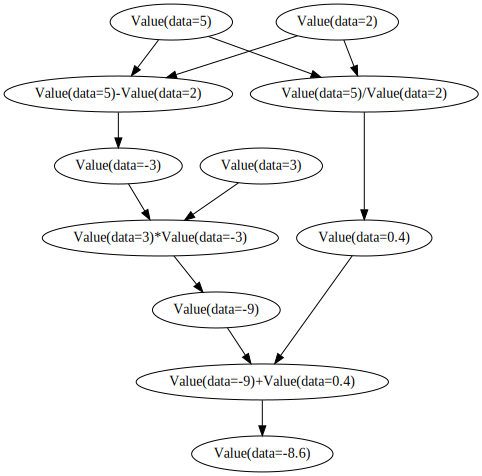

In [28]:
Value.plot_graph(nodes, operations)